<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05 Adding Noise**

> **204383 Image Processing** 

---

> **Tocktack | Kasidis Torcharoen (610510531)** \\
**Top | Kittisak Thammawong (610510611)**

In [2]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt

In [17]:
url = "0302.jpg"

image = io.imread(url)
image = cv.resize(image, (512, 288))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

## **Method 1 : Gaussian noise**

---

In [47]:
def gaussian(image, mean=0, stddev=0.1):
    gauss = np.random.normal(mean, stddev, image.shape)
    noisy = image + gauss
    return noisy.astype("uint8")

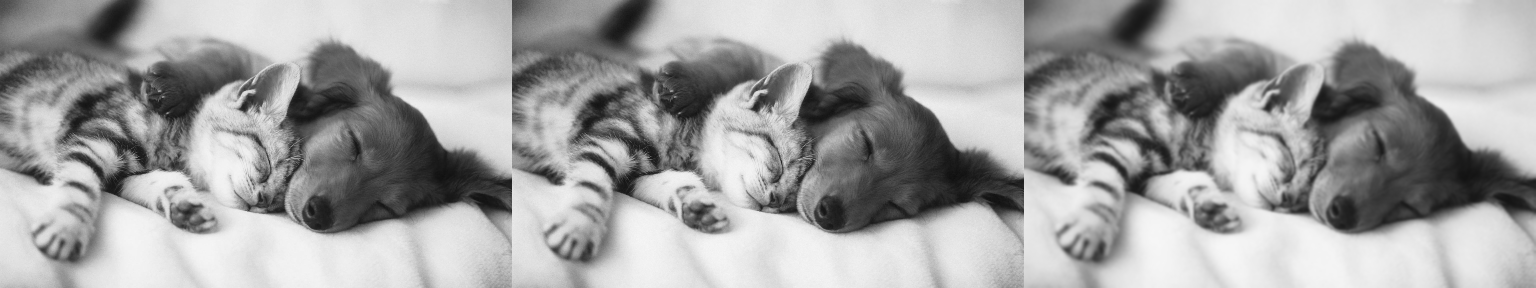

In [100]:
temp = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
noisy = gaussian(temp, stddev=1)
built_in = cv.GaussianBlur(temp, (5,5), 1)
frame = cv.hconcat((temp, noisy, built_in))
cv2_imshow(frame)

## **Method 2 : Salt-pepper noise**

---

In [75]:
def salt_pepper(image, sp_equil=0.5, sp_ratio=0.004):
    noisy = np.copy(image)

    num_salt = np.ceil(sp_ratio * image.size * sp_equil)
    coords = [ np.random.randint(0, i - 1, int(num_salt))
               for i in image.shape ]
    for r,c in zip(*coords): noisy[r,c] = 255

    num_pepper = np.ceil(sp_ratio * image.size * (1. - sp_equil))
    coords = [ np.random.randint(0, i - 1, int(num_pepper))
               for i in image.shape ]
    for r,c in zip(*coords): noisy[r,c] = 0
    
    return noisy.astype("uint8")

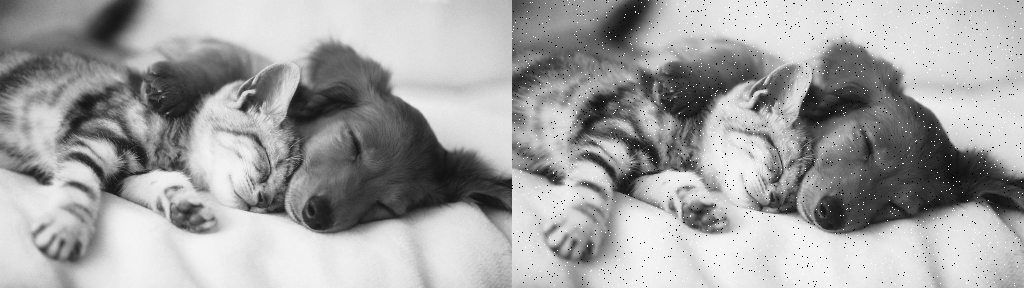

In [76]:
temp = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
noisy = salt_pepper(temp, 0.5, 0.02)
frame = cv.hconcat((temp, noisy))
cv2_imshow(frame)

## **Method 3 : Poisson noise**

---

In [80]:
def poisson(image):
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(image * vals) / float(vals)
    return noisy.astype("uint8")

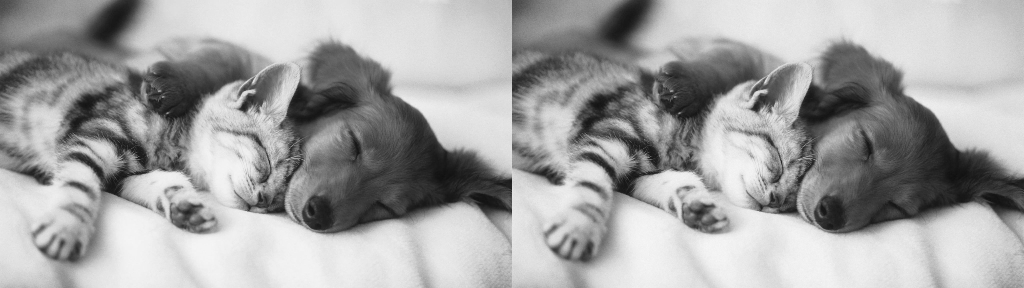

In [81]:
temp = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
noisy = poisson(temp)
frame = cv.hconcat((temp, noisy))
cv2_imshow(frame)

## **Method 4 : Speckle noise**

---

In [93]:
def speckle(image):
    row, col = image.shape
    gauss = np.random.randn(row, col)      
    noisy = image + image * gauss
    return noisy.astype("uint8")

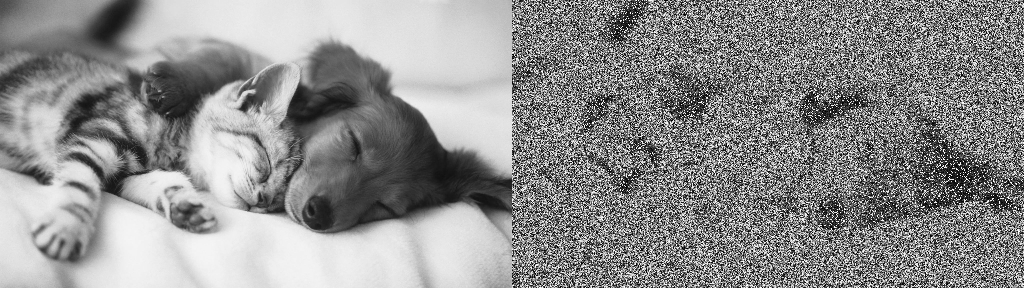

In [94]:
temp = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
noisy = speckle(temp)
frame = cv.hconcat((temp, noisy))
cv2_imshow(frame)